In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/philhoonoh/os/blob/main/lecture_summary/Python%20GIL.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View Source</a>
  </td>
</table>

# Python GIL
#### Contents
    - A. 파이썬 에도 종류가 있다? 
    - B. CPython
    - C. 파이썬 은 Interprter 아닌가요? 
    - D. Python GIL  
    - E. 파이썬 Multi-Threading, Multi-processing 
    - G. GIL 을 사용한 이유 그리고 제거하지 않는 이유

## A. 파이썬 에도 종류가 있다? 

- CPython 
  - C로 구현된 파이썬 
  - 일반적으로 파이썬이라고 하면 Cpython을 의미 
- Jython 
  - Java로 구현된 파이썬
  - 자바가상머신용 인터프리터
- lronPython 
  - C#로 구현된 파이썬
  - .NET 플랫폼용 인터프리터
- PyPy 
  - 파이썬으로 작성된 파이썬 인터프리터

## B. __CPython__

- C파이썬(CPython)은 파이썬 프로그래밍 언어의 참조 구현체이다.
- C와 파이썬으로 작성된 C파이썬은 이 언어에 가장 널리 사용되는 기본 구현체이다.
- C파이썬은 인터프리트 과정 이전에 파이썬 코드를 바이트코드로 컴파일하기 때문에 인터프리터이기도 하고 컴파일러이기도 하다.
  - .py -> Compile(CPython) -> .pyc (bytescode)
  - .pyc (bytescode) -> Interpret(CPython) -> run 

## C. 파이썬 은 interprter 언어 아닌가요? 

- 결론부터 말하자면 compile 언어이자 interpreter 언어 입니다. 

### compiler, interpreter (좁은)정의
- compiler 의 정의
  - 실행 시간 이전에 기계어 코드로 번역되는 언어
  - 컴파일 과정에서 오류를 발견
- interpreter 의 정의
  - 실행전에 기계어로의 컴파일 과정을 거치지 않으며, 소스코드가 해석기(인터프리터)에 의해 직접 해석되어 실행되도록 구현된 언어
  - 실행 과정에서 오류를 발견
- 언어의 구현이 발전함에 따라 두가지 다 사용... 
    - 기계어 대신 bytecode 로 compile
    - 해당 bytecode 를 interpret

### Java

- 자바의 경우 java compiler, java interpreter 가 있으면 아래의 도표와 같이 컴파일 + 인터프리트 됩니다. 
- .class 는 bytecode 입니다. 
- bytecode 의 이점
    - 빠른 실행
    - OS independent (JVM - Java Virtual Machine 즉 자바 환경만 구축되어 있다면 OS에 상관없이 실행가능)
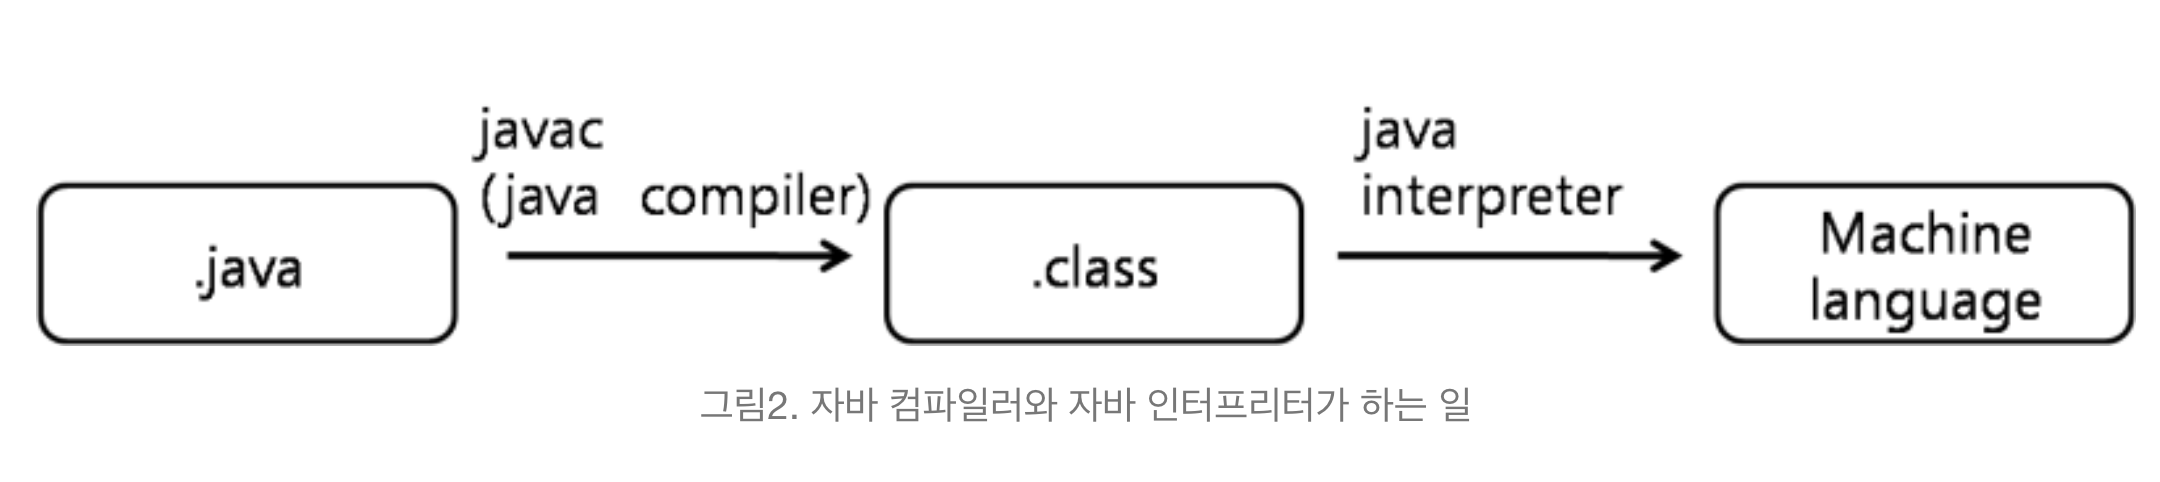

### Python 

- 일반적인 CPython 으로 예를 들겠습니다.
- compile, interpret 의 과정의 java와 비슷합니다. 다만 CPython이 모든 과정을 담당하고 있습니다. 
    - .py -> Compile (CPython) -> .pyc (bytescode)
    - .pyc (bytescode) -> Interpret(CPython) -> run
- 음? compile interpret 둘다 합니다.

## D. Python GIL  

#### GIL(Global Interpreter Lock)

```
In CPython, the global interpreter lock, or GIL, is a mutex that protects access to Python objects, preventing multiple threads from executing Python bytecodes at once. The GIL prevents race conditions and ensures thread safety. A nice explanation of how the Python GIL helps in these areas can be found here. In short, this mutex is necessary mainly because CPython's memory management is not thread-safe.
```
- GIL은 Python 객체에 대한 액세스를 보호하여 여러 스레드가 Python 바이트코드를 한 번에 실행하는 것을 방지하는 뮤텍스입니다.
- 이 뮤텍스는 주로 CPython의 메모리 관리가 스레드로부터 안전하지 않기 때문에 필요합니다.

```
In hindsight, the GIL is not ideal, since it prevents multithreaded CPython programs from taking full advantage of multiprocessor systems in certain situations. Luckily, many potentially blocking or long-running operations, such as I/O, image processing, and NumPy number crunching, happen outside the GIL. Therefore it is only in multithreaded programs that spend a lot of time inside the GIL, interpreting CPython bytecode, that the GIL becomes a bottleneck.
```
- I/O, 이미지 처리, NumPy 번호 처리와 같은 잠재적으로 차단되거나 오래 실행되는 많은 작업이 GIL 외부에서 발생
- CPython 바이트코드를 해석하고 GIL 내부에서 많은 시간을 보내는 다중 스레드 프로그램에서만 GIL이 병목 현상

- Jython 및 IronPython에는 GIL이 없으며 다중 프로세서 시스템을 완전히 활용할 수 있습니다.
- PyPy에는 현재 CPython과 같은 GIL이 있습니다.
- Cython에 GIL이 있지만 "with" 문을 사용하여 일시적으로 해제할 수 있습니다.

## E. 파이썬 Multi-Threading, Multi-processing 

#### Python Multi-Threading
- threading 모듈 사용
- GIL 때문에 multi-threading이 안좋다고 하는데... 왜 사용하나요?
    - CPU bound -> bottleneck -> 성능저하
    - I.O Bound -> happens outside GIL -> 성능향상

#### Python Multi-processing
- multiprocessing 모듈 사용
- GIL 에서 벗어나고 싶다.
- multi-processing 은 multi-threading 에 비해 무거움 (thread switcing < context switching)

## G. GIL 을 사용한 이유 그리고 제거하지 않는 이유

- GIL 사용 이유
    - Python은 메모리 관리를 위해 reference counting 사용합니다. 
    - 이는 파이썬에서 생성된 객체가 객체를 가리키는 참조의 수를 추적하는 참조 카운트 변수를 가진다는 것을 의미합니다. 
    - 이 카운트가 0에 도달하면 객체가 점유한 메모리가 해제됩니다.
    - 만약 다양한 쓰레드 에서 reference counting 을 동시에 변경하면, 파이썬 프로그램에 문제가 생길 것입니다.
    - 이를 방지하개 위해, 파이썬 바이트코드를 실행시 인터프리프리터 락을 획득해야 된다는 잠금장치인 GIL 이 필요한 것입니다. 

- GIL 를 제거하지 않은(못한) 이유
    - 이전 버전과의 비호환성 문제를 일으키지 않고 GIL을 제거하기가 어렵습니다.
    - 시도했지만, 성능이 저하가 일어남

## References

[What Is the Python Global Interpreter Lock](https://realpython.com/python-gil/#what-problem-did-the-gil-solve-for-python)  
[파이썬은 인터프리터언어입니까?](https://soooprmx.com/%ed%8c%8c%ec%9d%b4%ec%8d%ac%ec%9d%80-%ec%9d%b8%ed%84%b0%ed%94%84%eb%a6%ac%ed%84%b0%ec%96%b8%ec%96%b4%ec%9e%85%eb%8b%88%ea%b9%8c/)   
[GlobalInterpreterLock](https://wiki.python.org/moin/GlobalInterpreterLock)  
[“It isn’t Easy to remove the GIL”](https://www.artima.com/weblogs/viewpost.jsp?thread=214235)